In [1]:
import subprocess
import matplotlib.pyplot as plt

from pprint import pprint
from datetime import datetime, timedelta
from collections import Counter
from git import Repo

In [2]:
subprocess.call("git clone https://github.com/openstack/neutron.git", shell=True)

Cloning into 'neutron'...


0

In [3]:
def get_module(path):
    if path is None or not path.startswith("neutron") or not path.endswith(".py"):
        return None
    return ".".join(path.split("/")[:-1])

repo = Repo("neutron")
since = datetime.now() - timedelta(days = 3 * 365)
module2commits = Counter()
for commit in repo.iter_commits():
    if datetime.fromtimestamp(commit.committed_date) < since:
        continue
    if len(commit.parents) > 1:
        continue

    changed_modules = set()
    for diff in commit.diff(commit.parents[0]):
        changed_modules.add(get_module(diff.a_path))
        changed_modules.add(get_module(diff.b_path))
    if None in changed_modules:
        changed_modules.remove(None)
    
    for module in changed_modules:
        module2commits[module] += 1

top_5 = sorted(module2commits.items(), key=lambda x: -x[1])[0:5]
print(f"{len(module2commits)} modules changed")
print(f"Top 5 activity (in # of commits):")
pprint(top_5)

326 modules changed
Top 5 activity (in # of commits):
[('neutron.db', 197),
 ('neutron.plugins.ml2.drivers.ovn.mech_driver.ovsdb', 191),
 ('neutron.agent.linux', 113),
 ('neutron.common.ovn', 105),
 ('neutron.tests.unit.plugins.ml2.drivers.ovn.mech_driver', 97)]


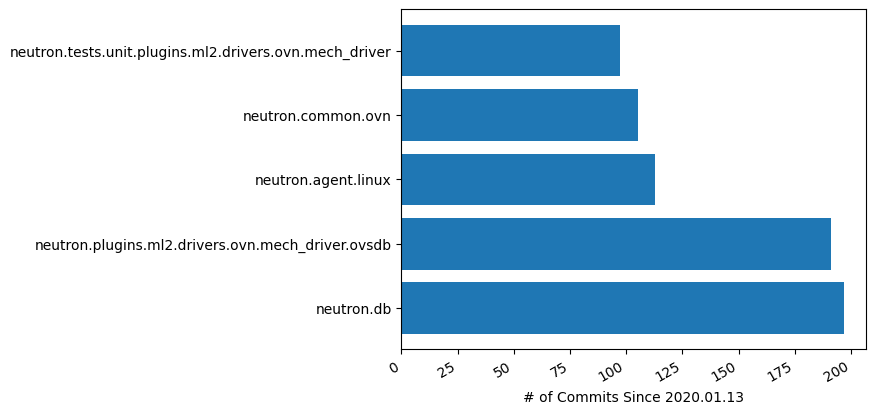

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.barh(y=range(5), width=[x[1] for x in top_5])
ax.set_yticks(range(5))
ax.set_yticklabels([x[0] for x in top_5])
ax.set_xlabel("# of Commits Since 2020.01.13")
fig.autofmt_xdate()
fig.savefig("Bar.png", dpi=300, bbox_inches="tight")